In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [5]:
test_dataset = MNIST(root='data/',train=False)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [7]:
import matplotlib.pyplot as plt

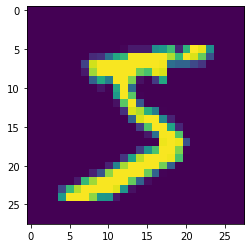

In [9]:
image, label = dataset[0]
plt.imshow(image)

In [10]:
import torchvision.transforms as transforms
#torchvision.transforms contain functions like convert image to tensors

In [11]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
img_tensor.shape

torch.Size([1, 28, 28])

# Traning and Validation

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
from torch.utils.data import  DataLoader

batch = 128

train_loader = DataLoader(train_ds, batch, shuffle=True)
val_loader = DataLoader(val_ds, batch)

# Model

In [21]:
import torch.nn as nn

input_sz = 28*28
num_classes = 10

model = nn.Linear(input_sz,num_classes)

In [26]:
model.weight.shape, model.bias.shape
# model.weight

(torch.Size([10, 784]), torch.Size([10]))

In [28]:
# 
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_sz, num_classes)

    def forward(self,x):
        x = x.reshape(-1,784)
        output = self.linear(x)
        return output
model = MnistModel()

In [29]:
model.linear.weight.shape, model.linear.bias.shape
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0063, -0.0087,  0.0065,  ...,  0.0248, -0.0057, -0.0042],
         [-0.0246,  0.0047,  0.0272,  ...,  0.0345,  0.0045,  0.0146],
         [ 0.0033, -0.0158,  0.0094,  ...,  0.0353,  0.0272, -0.0053],
         ...,
         [-0.0331, -0.0312, -0.0309,  ...,  0.0219,  0.0036, -0.0259],
         [ 0.0337,  0.0092,  0.0158,  ..., -0.0329,  0.0225, -0.0156],
         [-0.0110, -0.0040,  0.0147,  ..., -0.0178,  0.0123, -0.0120]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0161, -0.0133,  0.0235, -0.0200, -0.0157, -0.0218, -0.0279, -0.0331,
          0.0166, -0.0272], requires_grad=True)]

In [32]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.2260,  0.1684, -0.1491,  0.1519, -0.1716,  0.2930, -0.1107, -0.1881,
          0.0327,  0.1327],
        [-0.1407, -0.0050,  0.2511, -0.1384, -0.0656,  0.0614,  0.0696,  0.0648,
          0.0825, -0.1288]])


In [30]:
# softmax function
import torch.nn.functional as F

In [55]:
probs = F.softmax(outputs ,dim=1)
# dim = 1 row dim = 0 col

In [53]:
probs.shape,probs[0].data

(torch.Size([128, 10]),
 tensor([0.0089, 0.0086, 0.0059, 0.0084, 0.0079, 0.0094, 0.0063, 0.0070, 0.0070,
         0.0085]))

In [56]:
# torch.max returns largest element and its index
max_probs, preds = torch.max(probs, dim=1)

In [57]:
preds

tensor([5, 2, 8, 2, 8, 0, 5, 0, 5, 5, 6, 3, 2, 5, 8, 5, 2, 5, 6, 1, 5, 0, 6, 8,
        1, 3, 6, 6, 8, 9, 2, 6, 0, 7, 5, 6, 1, 0, 2, 5, 6, 5, 5, 6, 6, 9, 8, 3,
        2, 2, 2, 2, 5, 9, 2, 0, 3, 5, 8, 9, 1, 6, 6, 3, 1, 8, 6, 0, 0, 5, 5, 0,
        6, 0, 9, 0, 8, 8, 0, 8, 1, 5, 3, 8, 6, 2, 5, 0, 5, 0, 0, 1, 8, 8, 0, 2,
        2, 4, 6, 3, 0, 5, 1, 1, 6, 1, 1, 8, 3, 8, 0, 8, 1, 5, 5, 6, 9, 6, 6, 5,
        5, 0, 5, 5, 8, 3, 8, 0])

# Evaluation Metric and Loss F

In [80]:
def accuracy(outputs, targ):
    _, preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==targ).item() /len(preds))

In [59]:
accuracy(outputs, labels)

tensor(0.1094)

# Traning the model

    for epoch in range(num_epochs):
        # Training phase
        for batch in train_loader:
            # Generate predictions
            # Calculate loss
            # Compute gradients
            # Update weights
            # Reset gradients
        
        # Validation phase
        for batch in val_loader:
            # Generate predictions
            # Calculate loss
            # Calculate metrics (accuracy etc.)
        # Calculate average validation loss & metrics
        
        # Log epoch, loss & metrics for inspection


In [75]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_sz,num_classes)

    def forward(self,x):
        x = x.reshape(-1,28*28)
        out = self.linear(x)
        return out

    def training_step(self,batch):
        imgs ,labels = batch
        out = self(imgs)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self,batch):
        imgs, labels = batch
        out = self(imgs)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_step_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()


In [78]:
def evaluate(model,val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_step_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=''):
    history = []
    optimizer = torch.optim.SGD(model.parameters(), lr)
    for epoch in range(epochs):
        # Training
        for batch in train_loader:
            loss = model.training_step(batch) 
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation
        result = evaluate(model,val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [81]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.6798, val_acc: 0.7277
Epoch [1], val_loss: 1.4795, val_acc: 0.7599
Epoch [2], val_loss: 1.3281, val_acc: 0.7812
Epoch [3], val_loss: 1.2119, val_acc: 0.7933
Epoch [4], val_loss: 1.1207, val_acc: 0.8028


In [82]:
history2 = fit(5, 0.001, model, train_loader, val_loader

Epoch [0], val_loss: 1.0475, val_acc: 0.8101
Epoch [1], val_loss: 0.9877, val_acc: 0.8158
Epoch [2], val_loss: 0.9379, val_acc: 0.8205
Epoch [3], val_loss: 0.8959, val_acc: 0.8249
Epoch [4], val_loss: 0.8598, val_acc: 0.8293


In [84]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8287, val_acc: 0.8312
Epoch [1], val_loss: 0.8013, val_acc: 0.8352
Epoch [2], val_loss: 0.7772, val_acc: 0.8383
Epoch [3], val_loss: 0.7557, val_acc: 0.8417
Epoch [4], val_loss: 0.7364, val_acc: 0.8438


In [85]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7190, val_acc: 0.8458
Epoch [1], val_loss: 0.7032, val_acc: 0.8478
Epoch [2], val_loss: 0.6887, val_acc: 0.8489
Epoch [3], val_loss: 0.6755, val_acc: 0.8509
Epoch [4], val_loss: 0.6634, val_acc: 0.8523


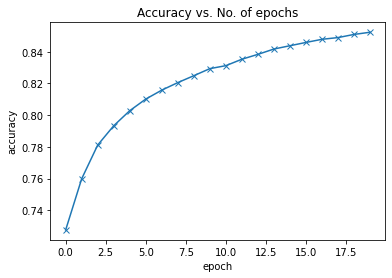

In [93]:
# Replace these values with your results
history = [] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Testing with individual images

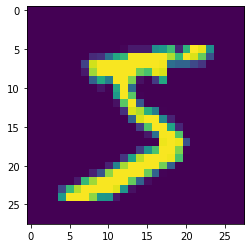

In [102]:
img,lab = dataset[0]
plt.imshow(img[0])

In [103]:
# img.unsqueeze adds another dimension from 1x28x28 to 1x1x28x28 
# which the model views as a batch containing a single image.
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

In [104]:
predict_image(img,model)

3

# Saving and Loading

In [108]:
# Save
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [107]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 6.7195e-04,  1.9966e-02, -3.1260e-03,  ..., -1.7327e-02,
                       -2.4115e-02, -1.7586e-02],
                      [ 2.1180e-02,  7.0483e-03,  1.4729e-02,  ...,  7.9307e-04,
                       -1.3785e-02,  1.4780e-02],
                      [ 1.8340e-02, -3.4899e-02, -9.2925e-03,  ...,  2.6306e-02,
                        2.2594e-02,  1.1976e-02],
                      ...,
                      [-3.0977e-02,  2.8755e-02, -1.0739e-02,  ...,  1.7429e-02,
                        1.6391e-02, -9.0599e-05],
                      [-1.1381e-02,  5.0450e-03, -1.1101e-02,  ...,  3.2144e-02,
                        1.7447e-02,  3.3031e-02],
                      [-2.1368e-02, -3.3264e-02,  2.4662e-03,  ...,  2.8777e-02,
                       -2.4668e-02, -6.0077e-03]])),
             ('linear.bias',
              tensor([-0.0668,  0.0824, -0.0360, -0.0364,  0.0537,  0.0677,  0.0133,  0.0260,
                      -0.0565,

In [110]:
# Load
model2 =MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 6.7195e-04,  1.9966e-02, -3.1260e-03,  ..., -1.7327e-02,
                       -2.4115e-02, -1.7586e-02],
                      [ 2.1180e-02,  7.0483e-03,  1.4729e-02,  ...,  7.9307e-04,
                       -1.3785e-02,  1.4780e-02],
                      [ 1.8340e-02, -3.4899e-02, -9.2925e-03,  ...,  2.6306e-02,
                        2.2594e-02,  1.1976e-02],
                      ...,
                      [-3.0977e-02,  2.8755e-02, -1.0739e-02,  ...,  1.7429e-02,
                        1.6391e-02, -9.0599e-05],
                      [-1.1381e-02,  5.0450e-03, -1.1101e-02,  ...,  3.2144e-02,
                        1.7447e-02,  3.3031e-02],
                      [-2.1368e-02, -3.3264e-02,  2.4662e-03,  ...,  2.8777e-02,
                       -2.4668e-02, -6.0077e-03]])),
             ('linear.bias',
              tensor([-0.0668,  0.0824, -0.0360, -0.0364,  0.0537,  0.0677,  0.0133,  0.0260,
                      -0.0565,